In [93]:
import feather
train = feather.read_dataframe("../data/input/tr_best.feather")
test = feather.read_dataframe("../data/input/t_best.feather")

In [94]:
score = train["Score"]
del train["Score"],train["index"],test["index"]

In [35]:

import json
import numpy as np
with open('../configs/Kbest_FE.json') as f:
    df = json.load(f)
fl_score = np.array(df["kbest_feature"]["float"])
int_score = np.array(df["kbest_feature"]["int"])
cate_score = np.array(df["kbest_feature"]["cate"])

In [38]:
import pandas as pd
c = cate_score
cate_tr = train[c]
cate_te = test[c]
tr_dummy = pd.get_dummies(cate_tr,columns=c,drop_first=True)
te_dummy = pd.get_dummies(cate_te,columns=c,drop_first=True)

NameError: name 'train' is not defined

In [91]:
for i in c:
    try:
        del train[i]
        del test[i]
    except:
        pass

In [8]:
def df_concat(flist):
    add_columns = flist[0].columns.values.tolist()
    add_df = flist[0].values
    for i in flist[1:]:
        add_columns += i.columns.values.tolist()
        add_df = np.c_[add_df,i.values]
    return pd.DataFrame(add_df,columns=add_columns)



In [14]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
stdsc = StandardScaler()
#stdsc = MinMaxScaler()
y = score
l_tr = stdsc.fit_transform(tra)
l_te = stdsc.transform(tes)
#l_tr=np.c_[l_tr,tra[list(c)]]
#l_te = np.c_[l_te,tes[list(c)]]

In [22]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.metrics import r2_score,log_loss
from sklearn.linear_model import ElasticNet,Lasso,Ridge,BayesianRidge,LinearRegression
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#l_tr = tra.values
#l_te = tes.values

kf = KFold(n_splits = 10,random_state=1103)
#kf = KFold(n_splits = 4,random_state=615) #[615,73]
predd = []
s = []
tr_pred = np.zeros((len(tra),))
for i,(tr_idx,val_idx) in enumerate(kf.split(l_tr)):
    tr_,valid = (l_tr[tr_idx,:],y[tr_idx]), (l_tr[val_idx,:],y[val_idx])
    

    #model = ExtraTreesRegressor(n_estimators=1000)
    model = ElasticNet(alpha=0.00001,l1_ratio=7,random_state = 1103)
            #ElasticNet(alpha=0.000075,l1_ratio=23,random_state = 1103)
    model.fit(tr_[0],tr_[1])
    pred = model.predict(valid[0])
    tr_pred[val_idx] = pred
    predd.append(model.predict(l_te))
    s.append(r2_score(valid[1],pred))
    print(r2_score(valid[1],pred))
np.mean(s)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.45330544942537176
0.4115469317136543
0.44010464148268535
0.4580630430675512
0.43657129206933487
0.3874206934528037
0.43767281561848004
0.39983369046440365
0.4412984254657484
0.3835048870823409


0.4249321869842374

In [290]:
sub = pd.read_csv("../data/input/sample_submit.csv",header = None)
sub.iloc[:,1] = np.mean(predd,axis = 0)


In [294]:
sub.to_csv("../data/output/submitElasticNet.csv",index = None,header = None)

In [23]:
import pandas as pd
tr_righ = pd.DataFrame(tr_pred,columns=[type(model).__name__])
te_righ = pd.DataFrame(np.mean(predd,axis = 0),columns=[type(model).__name__])

In [145]:
tr_righ1 = pd.DataFrame(tr_pred,columns=[type(model).__name__])
te_righ1 = pd.DataFrame(np.mean(predd,axis = 0),columns=[type(model).__name__])

In [32]:

tr_righ.to_feather("../features/stack_feature2/train/train_ElasticNet.feather")
te_righ.to_feather("../features/stack_feature2/test/test_ElasticNet.feather")

In [3]:
import feather
tra = feather.read_dataframe("../data/input/tr_best_pca_ifa.feather")
tes = feather.read_dataframe("../data/input/te_best_pca_ifa.feather")

In [4]:
score = tra["Score"]

In [5]:
del tra["Score"]

In [6]:
del tra["index"],tes["index"]

In [7]:
del tes["ID"]

In [19]:
model.predict(tes)

array([ -37737.96789852,  -50100.4621648 , -382459.65489999, ...,
        -27608.42416616, -940611.10182509, -849475.93239918])

In [40]:
tra = feather.read_dataframe("../data/input/tr_stack.feather")
tes = feather.read_dataframe("../data/input/te_stack.feather")

/usr/local/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


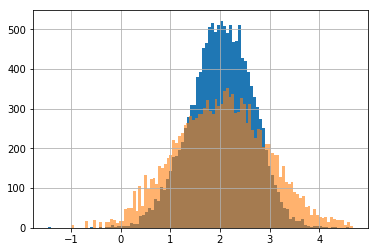

In [30]:
import numpy as np
import matplotlib.pyplot as plt
a = np.mean(predd,axis = 0)
plt.hist(tr_pred,bins = 100)
score.hist(bins = 100,alpha = 0.6)
plt.show()

In [39]:
num_tr = df_concat([tra[int_score],tra[fl_score]])
num_te = df_concat([tes[int_score],tes[fl_score]])

In [42]:
c = set(tra.columns) - set(num_tr)

In [250]:
tr_st = df_concat([tra,tr_righ])
te_st = df_concat([tes,te_righ])

In [36]:
tra.to_feather("../data/input/tr_stack.feather")
tes.to_feather("../data/input/te_stack.feather")

In [41]:
tra.columns.values

array(['ElasticNet', 'ExtraTreesRegressor10-05-09:40',
       'KNeighborsRegressor10-05-13:12', 'KNeighborsRegressor10-05-13:31',
       'KNeighborsRegressor10-05-13:54', 'KNeighborsRegressor10-05-14:21',
       'KNeighborsRegressor10-05-14:48', 'KNeighborsRegressor10-05-15:19',
       'KNeighborsRegressor10-05-15:48', 'KNeighborsRegressor10-05-16:23',
       'MLPRegressor10-04-16:41', 'MLPRegressor10-04-17:06',
       'RandomForestRegressor10-05-01:59', 'fl_PCA_1', 'fl_PCA_10',
       'fl_PCA_11', 'fl_PCA_12', 'fl_PCA_13', 'fl_PCA_14', 'int_PCA_1',
       'int_PCA_10', 'int_PCA_11', 'cate_PCA_1', 'cate_PCA_10',
       'cate_PCA_11', 'cate_PCA_12', 'cate_PCA_13', 'cate_PCA_14',
       'cate_PCA_15', 'cate_PCA_16', 'cate_PCA_17', 'cate_PCA_18',
       'cate_PCA_19', 'cate_PCA_2', 'cate_PCA_20', 'cate_PCA_21',
       'cate_PCA_22', 'cate_PCA_23', 'cate_PCA_24', 'cate_PCA_25',
       'cate_PCA_26', 'cate_PCA_27', 'cate_PCA_28', 'cate_PCA_29',
       'cate_PCA_3', 'cate_PCA_30', 'Score'], 

In [110]:
sum(tr_st["BayesianRidge"] - tr_st["KNeighborsRegressor10-04-12:43"])

-550.9095337859178

In [255]:
del tr_st['Lasso'],te_st['Lasso']

In [151]:
del tra['Ridge']

In [155]:
del tes['Ridge']

In [38]:
del tra["Score"]

KeyError: 'Score'

In [241]:
del tra[""], tes["ElasticNet"]

In [295]:
aa = tr_st.append(te_st)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [311]:
import feather
tr = feather.read_dataframe("../data/input/tr_best.feather")
te = feather.read_dataframe("../data/input/te_best.feather")

In [312]:
del tr["index"],tr["Score"],te["index"]

In [313]:
data = tr.append(te)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [314]:
data["ElasticNet"] = aa["ElasticNet"]
data["MLP1"] = aa["MLPRegressor10-04-10:04"]
data["Ridge"] = aa["Ridge"]
data["MLP2"] = aa["MLPRegressor10-04-10:13"]

In [315]:
i =27463//2
tr,te = data.iloc[:i,:],data.iloc[i:,:]

In [316]:
tr["Score"] = score

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [317]:
#tr = tr.reset_index()
#te = te.reset_index()
tr.to_feather("../data/input/tr_best_meta.feather")
te.to_feather("../data/input/te_best_meta.feather")
import json
del tr["Score"]
ff = tr.columns.values.tolist()
features = {"features":ff, "target_name":"Score"}

with open("../configs/config_kbest_meta.json","w") as f:
    json.dump(features,f)

In [326]:
tes.columns.values

array(['ExtraTreesRegressor10-04-11:37', 'KNeighborsRegressor10-04-12:08',
       'KNeighborsRegressor10-04-12:12', 'KNeighborsRegressor10-04-12:16',
       'KNeighborsRegressor10-04-12:20', 'KNeighborsRegressor10-04-12:26',
       'KNeighborsRegressor10-04-12:31', 'KNeighborsRegressor10-04-12:37',
       'LightGBMSELoss', 'LightGBMr2', 'MLPRegressor10-04-10:04',
       'MLPRegressor10-04-10:13', 'RandomForestRegressor10-04-10:25',
       'cate_PCA_1', 'cate_PCA_2', 'cate_PCA_3', 'cate_PCA_4',
       'cate_PCA_5', 'cate_PCA_6', 'cate_PCA_7', 'cate_PCA_8',
       'cate_PCA_9', 'cate_PCA_10', 'cate_PCA_11', 'cate_PCA_12',
       'cate_PCA_13', 'cate_PCA_14', 'cate_PCA_15', 'cate_PCA_16',
       'cate_PCA_17', 'cate_PCA_18', 'cate_PCA_19', 'cate_PCA_20',
       'cate_PCA_21', 'cate_PCA_22', 'cate_PCA_23', 'cate_PCA_24',
       'cate_PCA_25', 'cate_PCA_26', 'cate_PCA_27', 'cate_PCA_28',
       'cate_PCA_29', 'cate_PCA_30', 'Ridge', 'ElasticNet'], dtype=object)

In [322]:
c = tra.loc[:,'fl_PCA_1':'int_PCA_11'].columns

In [324]:
tra.drop(c,axis = 1, inplace = True)
tes.drop(c,axis = 1, inplace = True)

In [328]:
tra["Score"]

In [44]:
import torch as th
a = th.Tensor([1])

In [47]:
a + np.n

tensor([2.])